In [18]:
%config IPCompleter.greedy = True #para que el notebook autocomplete

# TP2: Genetic algorithm

In [19]:
import string
import random
import numpy as np
from abc import ABC, abstractmethod
#string.printable

#Abstract class
class initialization (ABC):
    @abstractmethod
    def __init__(self):
        pass
#Class inherit
class hinicialization(initialization):
    #Method    
    def __init__(self, alphabet, targ):
        super().__init__()
        self.target = list(targ) #I separate the input target making it a list of characters (genes)
        self.individual = np.random.choice(list(alphabet),len(targ), replace=True) #I generate the genes of the individual
        self.phrase = "".join(self.individual) #I merge the genes into a single string output
        self.targetPhrase = "".join(self.target) #I merge the target into a single string output again
        self.fn = 0 #I create an attribute for the fitness number of each individual

#Abstract class
class fitness(ABC):
    @abstractmethod
    def fitnessFunction():
        pass
#Class inherit
class fitnessF(fitness):
    def fitnessFunction(x):
        y = len(x.individual[x.target == x.individual]) #I compare each gene between the individual and the target
        #and I count the number of coincidences
        fitnessNumber = y/(len(x.individual)) #I take the number of coincidences and I divide it by the total of genes
        x.fn = fitnessNumber # I give each individual his fitness number.

#Abstract class
class populationInitial(ABC):
    @abstractmethod
    def ipopulation():
        pass
#Class inherit
class population(populationInitial):
    def ipopulation(ni,alphabet, targ):
        populat=[]
        for i in range(ni):
            populat.append(hinicialization(alphabet,targ))# I take one individual
            fitnessF.fitnessFunction(populat[i]) #I take his fitness number
            populat.sort(key=lambda x: x.fn, reverse=True) #This way I sort the individuals by the fitness number. Drecreasing.
        return populat 

class selection(ABC): #The strongest individuals
    @abstractmethod
    def selectionRate():
        pass
class select(selection):
    def selectionRate(ri,popula):
        r = round(ri * len(popula)) #I multiply the selection rate by the length of the population to calculate hot many
        #of the strongest individuals I'm going to take
        newPopulation = popula[:r] #From the population I take the strongest individual starting from the top
        return newPopulation 

class cross(ABC):
    @abstractmethod
    def crossOver():
        pass
class crossO(cross):
    def crossOver(ni, newPopulat, crossRate):
        nextGeneration = []
        targ=newPopulat[0].targetPhrase
        for i in range(ni):
            p = np.random.choice(newPopulat, 2, replace=False) #Pair of individuals to create the new individual
            n = len(p[0].individual) #I calculate the length of one of the individuals (Both have the same length)
            cr = round(n * crossRate) #I multiply the length by CrossRate to calculate how much father and mother the new
            #individual will have
            doomie = hinicialization(string.ascii_lowercase  + " ", targ) 
            # I create a doomie so I could have a container of the
            #inicial class with all the atributes.
            pa = p[0].individual# Individual's father
            ma = p[1].individual # Individual's mother
            f1 = pa[:cr] #Dad's part
            f2 = ma[cr:] #mom's part
            h = np.concatenate((f1,f2)) #New individual
            doomie.individual = h #New individual replace the doomie created before
            doomie.phrase="".join(h) #I put the individual as a phrase
            fitnessF.fitnessFunction(doomie) #Fitness number for the new individual
            nextGeneration.append(doomie) #I add the new individual to the next generation
            nextGeneration.sort(key= lambda x:x.fn,reverse=True)
        return nextGeneration
    
class mutate(ABC):
    @abstractmethod
    def mutationSelected():
        pass
class mutation(mutate):
    def mutationSelected(mi, newGeneration):
        n = len(newGeneration) #I calculate the length of the generation
        mr = round(n * mi) #I calculate how many individuals of the generation I'm going to mutate 
        im = np.random.choice(newGeneration, mr, replace=False) #I choose the individuals for the mutation
        for i in range(mr):
            lm = np.random.choice(newGeneration[1].target, 1) #I get one gene from the target to use it in the mutation
            #Since I want the individual to be closer each time to the target I only use genes (letters) that are part
            #of the target to put it in the individual
            errors = newGeneration[i].individual[~(newGeneration[i].individual == newGeneration[i].target)]
            if len(errors) == 0:
                pass
            else:
                s1 = np.random.choice(errors) 
                #I choose one gene of the individual randomly
                interVar=len(np.where(newGeneration[i].individual == s1)[0])-1 #I get the largest index so I can see if the
                #gene (letter) is more than once in the individual
                if interVar>0: #If the gene is more than once in the individual I use this condition
                    s2 = np.where(newGeneration[i].individual == s1 )[0][random.randint(0, interVar)] #I choose
                    #randomly one of the position of the gene that I found as "s1"
                else:#If there's only one gene I use this condition
                    s2=np.where(newGeneration[i].individual == s1 )[0][0] 
                im[i].individual[s2] = lm[0] #I put the new gene 
                im[i].phrase="".join(im[i].individual)
                fitnessF.fitnessFunction(im[i])

In [20]:
alphabet = string.ascii_lowercase  + " " #Creating the alphabet for the individuals
target = "I am a human"#"I use a genetic algorithm to solve an optimization problem" #The target wich I gonna use to compare it 
#with the individuals to calculate the fitness number
ni1 = int(input("Write the population size: ")) 
ri1 = float(input("Write the selection rate: "))
ci1 = float(input("Write the crossover rate: "))
mi1 = float(input("Write the mutation rate: "))
pop = population.ipopulation(ni1,alphabet,target) #Calulate the polulation
newPop = select.selectionRate(ri1,pop) #The strongest individuals of the population
ng = crossO.crossOver(ni1, newPop, ci1) #The next generation of individuals

Write the population size: 8
Write the selection rate: 0.5
Write the crossover rate: 0.4
Write the mutation rate: 0.3


In [543]:
[pop[i].fn for i in range(ni1)]

[0.1206896551724138,
 0.1206896551724138,
 0.10344827586206896,
 0.10344827586206896,
 0.10344827586206896,
 0.10344827586206896,
 0.10344827586206896,
 0.10344827586206896,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.08620689655172414,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.06896551724137931,
 0.068965517

In [544]:
[newPop[i].phrase for i in range(len(newPop))]

['crkuejwxpmilrucqpiuidmqhs ndbflljddzqmajrghllphomdtprsvesd',
 'gw wzlniuililifwxwrvlixdohnjzpouqddajpmbsudnzr jfd udyql l',
 'clelcjvfxsq ndqkldozvnlvjmiopionixwogiwxdimijmkmigcktzbgtk',
 'ikccxlcqcewlrwiuwzlrjo jcdedfkoyvi vpfkjqaqkzyjjnjkwjqbtsc',
 'zrnhiwqzljmlbflmqnyybanhmsisfvoznouilbokormqfiiozymzlbbzbx',
 'hxacrnrioehlipubgpcow twmayvxuztxqgxzbfcrewjvilgsyjpsofjcu',
 'dfctonkqrfmbccwqaas hyxfixoftsrdvvjqciuzushqaatcsoucjrszeg',
 'phnlappcpcdqkcjnadgvfitqjnltyfxrbhzxp vhrvaspbijfzwl vyieo',
 'jdulcvrxivfuoxsicvcssxztrbn q dibelfoipctwuoajkpwhnrodilmm',
 'tyfqfel qlzxujcqfsefdnmh ybdchnxtsennpiyjrmhwpumqphann oll',
 'ccdubualhovcsep mlfs slhapaw mmvtprtpszfdocbuecwwkjdssrwvz',
 'xoohnmpdjsmkxugxcualuatjlrwnmkdkmbnrqvwpnetiojtyvnuryjnusw',
 'g pcgnvviebtkgoeafidawjtjushufdlyoektvtgnhlxskwmroipiewuxv',
 'cgpzgqaylcgcxfsgap i xqztwykfykqtveewvdvatmkz pkkbbkepslwe',
 'ydmtwjpxwveosairlgperrtagkyvzoo okqbfeisdjnabasqeeu ijbcor',
 'udaoudx qnoakuceisovyccbqmfkssjojgipusjevcudcujqsnclj

In [545]:
[ng[i].phrase for i in range(ni1)] #Crear una lista apartir de un ciclo en una sola linea

['hxacrnrioehlipubgpcow twmayvxsrdvvjqciuzushqaatcsoucjrszeg',
 'w kod kokejoepmaxdfixyrlxfkw ionixwogiwxdimijmkmigcktzbgtk',
 'qdgvqob fpypewmsnsscoeohcytugkoyvi vpfkjqaqkzyjjnjkwjqbtsc',
 'hxacrnrioehlipubgpcow twmayvxcorwppdnuovkcyadeythcizuz tyt',
 'wjwsgfgnwecousvbpelhemzvsufacpouqddajpmbsudnzr jfd udyql l',
 'lkpkiqs ognyc ahwisqn fryxehbpouqddajpmbsudnzr jfd udyql l',
 'ccdubualhovcsep mlfs slhapaw edbgx mqtoicugzrjudmmlynkcegg',
 'kdzsleabwhvcbpzzjeuiibkpioz okoyvi vpfkjqaqkzyjjnjkwjqbtsc',
 'crvawveigadavnwg lbfyfcuxbhpikoyvi vpfkjqaqkzyjjnjkwjqbtsc',
 'hxacrnrioehlipubgpcow twmayvxgoewbea jaxhqmrh kxcaklzxgycx',
 'ozmuzlltdzizloursxgitgkimyjftpouqddajpmbsudnzr jfd udyql l',
 'kp x aa phddciljngsyjqwrub sevoznouilbokormqfiiozymzlbbzbx',
 'sw xxelog tuwqylfpdgawtkbp nykoyvi vpfkjqaqkzyjjnjkwjqbtsc',
 ' hmfez hbdktlpgeaajlwnicfkothkoyvi vpfkjqaqkzyjjnjkwjqbtsc',
 'ow kaad eevzfcaubmnjbno ehmkapouqddajpmbsudnzr jfd udyql l',
 'qdgvqob fpypewmsnsscoeohcytugrklvbymbnvnbdnywacjmcdau

In [540]:
mutation.mutationSelected(mi1, ng)
[ng[i].phrase for i in range(ni1)] 

['mbehpe',
 'mb ape',
 'awbqye',
 'mb hpe',
 'mb hpe',
 'cb hpe',
 'awbqye',
 'awbqye',
 'awbqye',
 'awbq e',
 'mb hpe',
 'mb hpe',
 'mbbhpe',
 'mb hpe',
 'awbqae',
 'mb hpe',
 'mb hpe',
 'mb hpe',
 'mb cpe',
 'awbqde']

In [21]:
mv = 0
fi = hinicialization(alphabet, target)
iterationNumber = 1

while mv < 1:
    maxobj=max(ng,key=lambda x:x.fn)
    if maxobj.fn > mv:
        mv = maxobj.fn
        fi.individual = maxobj.individual
        fi.phrase = maxobj.phrase
        fi.fn = mv
    newPop  = select.selectionRate(ri1, ng)
    ng = crossO.crossOver(ni1, newPop, ci1)
    mutation.mutationSelected(mi1, ng)
    iterationNumber += 1
print(iterationNumber,fi.individual,fi.phrase,fi.fn)

69 ['I' ' ' 'a' 'm' ' ' 'a' ' ' 'h' 'u' 'm' 'a' 'n'] I am a human 1.0


# part II

In [3]:
from matplotlib import pyplot as plt
import random
from math import sqrt
import numpy as np
from abc import ABC, abstractmethod

In [24]:
class citylist(ABC):
    @abstractmethod
    def __init__(self):
        pass
class cities(citylist):
    def __init__(self, nc, method = "c"):
        self.cityIds = [i for i in range(1,nc+1)]
        ylis=[]
        xlis=[]
        if method == "c":
            for i in np.arange(0.1,10,(2*10/nc)):
                ylis.append(i)
                ylis.append(i)
                xlis.append((25-(i-5)**2)**0.5+5) #calculating one of the x-coordinates of a radious 5 circle with center in  (5,5) for a given y
                xlis.append(-(25-(i-5)**2)**0.5+5)# calculating the other x-coordinate for the same given y
        elif method == "r":
            for i in range(nc):
                ylis.append(random.sample(list(np.arange(0,10,0.1)),k=1)[0])
                xlis.append(random.sample(list(np.arange(0,10,0.1)),k=1)[0])
        self.x=xlis
        self.y=ylis 
        
        
    
class initialization (ABC):
    @abstractmethod
    def __init__(self):
        pass
#Class inherit
class hinicialization(initialization):
    #Method    
    def __init__(self, cit):
        super().__init__()
        self.indiv = [i for i in cit.cityIds]
        random.shuffle(self.indiv)
        self.dist = 0
class absdistance(ABC):
    @abstractmethod
    def calc_dist():
        pass
class distance(absdistance):
    def calc_dist(comb,cit):
        res=0
        for i in range(len(comb.indiv)-1):
            interVar=((cit.x[comb.indiv[i]-1]-cit.x[comb.indiv[i+1]-1])**2+(cit.y[comb.indiv[i]-1]-cit.y[comb.indiv[i+1]-1])**2)**0.5
            res+=interVar
        res+=((cit.x[comb.indiv[0]-1]-cit.x[comb.indiv[-1]-1])**2+(cit.y[comb.indiv[0]-1]-cit.y[comb.indiv[-1]-1])**2)**0.5
        comb.dist=res
class populationInitial(ABC):
    @abstractmethod
    def ipopulation():
        pass
#Class inherit
class population(populationInitial):
    def ipopulation(ni, cit):
        populat=[]
        for i in range(ni):
            populat.append(hinicialization(cit))# I take one individual
            distance.calc_dist(populat[i],cit) #I take his fitness number
            populat.sort(key=lambda x: x.dist, reverse=False) #This way I sort the individuals by the fitness number. Drecreasing.
        return populat 
class selection(ABC): #The strongest individuals
    @abstractmethod
    def selectionRate():
        pass
class select(selection):
    def selectionRate(ri,popula):
        r = round(ri * len(popula)) #I multiply the selection rate by the length of the population to calculate hot many
        #of the strongest individuals I'm going to take
        newPopulation = popula[:r] #From the population I take the strongest individual starting from the top
        return newPopulation 
class cross(ABC):
    @abstractmethod
    def crossOver():
        pass
class crossO(cross):
    def crossOver(ni, newPopulat, crossRate,cit):
        nextGeneration = []
        COI=round(crossRate*len(newPopulat[0].indiv))
        for i in range(ni):
            doomie=hinicialization(cit)
            p=np.random.choice(newPopulat,2,replace=False)
            iniIndex=random.randint(0,len(newPopulat[0].indiv)-COI)
            sp1=p[0].indiv[iniIndex:iniIndex+COI]
            sp2=[i for i in np.setdiff1d(p[1].indiv,sp1)]
            nc=[]
            if iniIndex==0:
                nc=sp1+sp2
            elif iniIndex == len(newPopulat[0].indiv)-COI:
                nc=sp2+sp1
            else:
                nc=[i for i in np.zeros(len(newPopulat[0].indiv))]
                nc[:iniIndex]=sp2[:iniIndex]
                nc[iniIndex:iniIndex+COI]=sp1
                nc[iniIndex+COI:]=sp2[iniIndex:]
            doomie.indiv=nc
            distance.calc_dist(doomie,cit) #I take his fitness number
            nextGeneration.append(doomie)
            nextGeneration.sort(key=lambda x: x.dist, reverse=False) #This way I sort the individuals by the fitness number. Drecreasing.
        return nextGeneration 

class mutate(ABC):
    @abstractmethod
    def Rmutation():
        pass
class mutation(mutate):
    def Rmutation(newPopu,mr,cit):
        nm = round(len(newPopu) * mr)
        mPopul=np.random.choice(newPopu,nm,replace=False)
        for i in mPopul:
            rn=random.randint(1,len(i.indiv))
            rindex=random.randint(0,len(i.indiv)-1)
            i.indiv[i.indiv.index(rn)],i.indiv[rindex]=i.indiv[rindex],rn
            distance.calc_dist(i,cit)
        newPopu.sort(key=lambda x:x.dist, reverse=False)
class plotso(ABC):
    @abstractmethod
    def VisualizeInd():
        pass
class graphical(plotso):
    def VisualizeInd(indi,cl):
        x=[cl.x[i-1]for i in indi.indiv]
        y=[cl.y[i-1]for i in indi.indiv]
        xl=x+[x[0]]
        yl=y+[y[0]]
        n=indi.indiv
        fig, ax = plt.subplots()
        ax.plot(x, y, 'ro', xl, yl, 'b')
        for i, txt in enumerate(n):
            ax.annotate(str(txt), xy=(x[i], y[i]+0.2))


In [46]:
ncit=10
nind=200
sr=0.4
cor=0.875
mutR=0.65
cl=cities(ncit,"c")
pop=population.ipopulation(nind,cl)
spop=select.selectionRate(sr,pop)
npop=crossO.crossOver(nind,spop,cor,cl)
mutation.Rmutation(npop,mutR,cl)

26 29.897290540097632


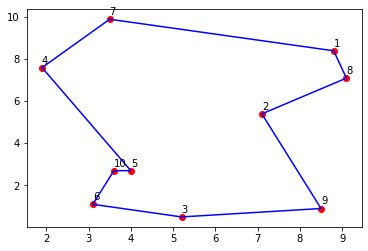

In [47]:
flag=0
minimum=10000
itera=1
minobj=-1
iteraciones=1000
gen=0
while flag==0:
    if minimum> min(npop, key=lambda x:x.dist).dist:
        minobj=min(npop, key=lambda x:x.dist)
        minimum=min(npop, key=lambda x:x.dist).dist
        gen=itera
    spop=select.selectionRate(sr,npop)
    npop=crossO.crossOver(nind,spop,cor,cl)
    mutation.Rmutation(npop,mutR,cl)
    itera+=1
    if itera==iteraciones:
        flag=1
print(gen, minobj.dist)
graphical.VisualizeInd(minobj,cl)  